In [1]:
%autosave 0

Autosave disabled


# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset: 

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [ ]:
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras
TF_ENABLE_ONEDNN_OPTS=0

2025-12-02 04:43:13.629764: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-02 04:43:13.956280: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-02 04:43:15.221809: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
from tensorflow.keras.preprocessing.image import load_img

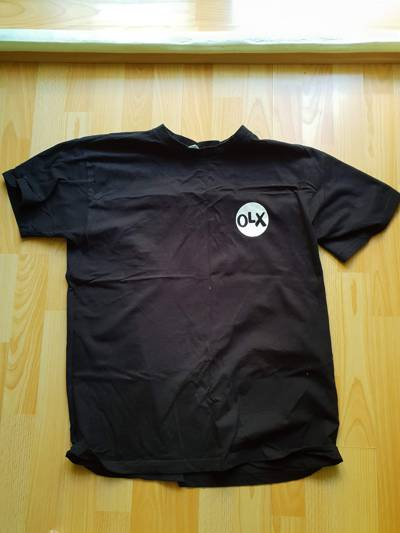

In [5]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [6]:
img = load_img(fullname, target_size=(299, 299))

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1764650608.573282   11297 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21768 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


In [10]:
X = np.array([x])

In [11]:
X.shape

(1, 299, 299, 3)

In [12]:
X = preprocess_input(X)
X[0]

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [13]:
pred = model.predict(X)
pred

2025-12-02 04:43:38.591142: I external/local_xla/xla/service/service.cc:163] XLA service 0x7d8a20002ad0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-02 04:43:38.591166: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-12-02 04:43:38.617842: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-02 04:43:38.918177: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600
2025-12-02 04:43:41.701481: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-02 04:43:41.889020: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


array([[3.23752029e-04, 1.57283866e-04, 2.13411928e-04, 1.52314387e-04,
        2.47615972e-04, 3.04813031e-04, 3.20446532e-04, 1.47511921e-04,
        2.03555566e-04, 1.49324493e-04, 1.95593253e-04, 2.10029146e-04,
        7.58941169e-05, 1.13950548e-04, 1.62591517e-04, 2.04540615e-04,
        1.97295463e-04, 1.44221980e-04, 1.40111064e-04, 1.73621680e-04,
        7.46228849e-04, 2.56715983e-04, 2.66775838e-04, 2.96390033e-04,
        3.73362855e-04, 2.77293468e-04, 2.16454107e-04, 2.27213721e-04,
        3.80777434e-04, 1.72054613e-04, 3.05401074e-04, 1.96392124e-04,
        3.92062007e-04, 4.77957365e-04, 2.91529985e-04, 3.25639849e-04,
        1.47358951e-04, 1.62332450e-04, 2.12615574e-04, 1.34011731e-04,
        2.39985966e-04, 6.75093150e-04, 2.54898041e-04, 1.44487538e-04,
        4.12816706e-04, 2.04301410e-04, 3.02909728e-04, 1.49284198e-04,
        1.99574482e-04, 2.26973541e-04, 2.93649384e-04, 2.27366094e-04,
        6.37612946e-04, 7.82363350e-04, 2.49559846e-04, 4.050952

In [14]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.6821478)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038052246)),
  ('n04370456', 'sweatshirt', np.float32(0.034298237)),
  ('n03710637', 'maillot', np.float32(0.011359435)),
  ('n04525038', 'velvet', np.float32(0.0018457148))]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense 
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [17]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [18]:
X, y = next(train_ds)

In [19]:
X[0]

array([[[ 0.22352946,  0.14509809,  0.05098045],
        [-0.0745098 , -0.1372549 , -0.2235294 ],
        [ 0.20000005,  0.15294123,  0.05882359],
        ...,
        [ 0.654902  ,  0.654902  ,  0.5921569 ],
        [ 0.6627451 ,  0.6627451 ,  0.6       ],
        [ 0.67058825,  0.67058825,  0.60784316]],

       [[-0.08235294, -0.1607843 , -0.25490195],
        [ 0.02745104, -0.03529412, -0.12156862],
        [ 0.12156868,  0.07450986, -0.01960784],
        ...,
        [ 0.6627451 ,  0.6627451 ,  0.6       ],
        [ 0.6784314 ,  0.6784314 ,  0.6156863 ],
        [ 0.6784314 ,  0.6784314 ,  0.6156863 ]],

       [[-0.10588235, -0.18431371, -0.27843136],
        [ 0.0196079 , -0.04313725, -0.12941176],
        [ 1.        ,  1.        ,  0.90588236],
        ...,
        [ 0.6784314 ,  0.6784314 ,  0.6156863 ],
        [ 0.69411767,  0.69411767,  0.6313726 ],
        [ 0.69411767,  0.69411767,  0.6313726 ]],

       ...,

       [[-0.16862744, -0.16862744, -0.24705881],
        [-0

In [20]:
y[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [21]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [22]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [23]:
learning_rate = 0.00115
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [24]:
history = model.fit(train_ds, epochs=16, validation_data=val_ds)

Epoch 1/16


2025-12-02 09:44:40.324908: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv (f32[32,128,36,36]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,36,36]{3,2,1,0}, f32[128,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]} is taking a while...
2025-12-02 09:44:40.356909: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 4h59m54.22750924s
Trying algorithm eng3{k11=2} for conv (f32[32,128,36,36]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,36,36]{3,2,1,0}, f32[128,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target="__

47/96 ━━━━━━━━━━━━━━━━━━━━ 5:19:31 391s/step - accuracy: 0.4331 - loss: 1.6734

2025-12-02 04:45:03.350783: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-02 04:45:03.536951: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-02 04:45:04.068926: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-02 04:45:04.256014: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-02 04:45:04.849767: E external/local_xla/xla/stream_

96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 279ms/step - accuracy: 0.6395 - loss: 1.0560 - val_accuracy: 0.7566 - val_loss: 0.7062
Epoch 2/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.7947 - loss: 0.6062 - val_accuracy: 0.7801 - val_loss: 0.6475
Epoch 3/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8338 - loss: 0.4851 - val_accuracy: 0.8211 - val_loss: 0.5765
Epoch 4/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.8745 - loss: 0.3965 - val_accuracy: 0.8065 - val_loss: 0.5755
Epoch 5/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.8941 - loss: 0.3499 - val_accuracy: 0.8035 - val_loss: 0.5601
Epoch 6/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9172 - loss: 0.3005 - val_accuracy: 0.8123 - val_loss: 0.5583
Epoch 7/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9345 - loss: 0.2674 - val_accuracy: 0.8035 - val_loss: 0.5491
Epoch 8/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9404 - loss: 0.2320 - val_accuracy: 0.8035 - val_loss

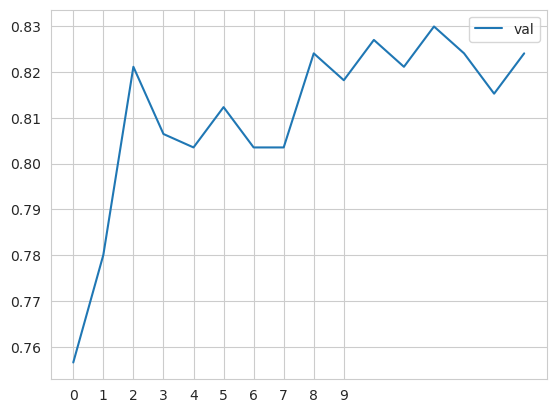

In [25]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [27]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [28]:
scores = {}

for lr in [0.0001, 0.001,0.005, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10


2025-12-02 09:48:00.673025: E external/local_xla/xla/service/slow_operation_alarm.cc:73] 
********************************
[Compiling module a_inference_one_step_on_data_27883__.6069] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2025-12-02 09:48:00.684196: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 4h59m54.759726545s

********************************
[Compiling module a_inference_one_step_on_data_27883__.6069] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


96/96 ━━━━━━━━━━━━━━━━━━━━ 18011s 190s/step - accuracy: 0.3784 - loss: 1.9079 - val_accuracy: 0.4721 - val_loss: 1.6319
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ -17986s 86ms/step - accuracy: 0.5629 - loss: 1.3946 - val_accuracy: 0.5924 - val_loss: 1.2983
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.6330 - loss: 1.1577 - val_accuracy: 0.6364 - val_loss: 1.1253
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.6793 - loss: 1.0187 - val_accuracy: 0.7009 - val_loss: 1.0043
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.7001 - loss: 0.9249 - val_accuracy: 0.7273 - val_loss: 0.9304
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.7282 - loss: 0.8550 - val_accuracy: 0.7390 - val_loss: 0.8750
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.7402 - loss: 0.8032 - val_accuracy: 0.7507 - val_loss: 0.8345
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.7458 - loss: 0.7584 - val_accuracy: 0.7507 - v

2025-12-02 09:54:21.388130: E external/local_xla/xla/service/slow_operation_alarm.cc:73] 
********************************
[Compiling module a_inference_one_step_on_data_83839__.6069] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2025-12-02 04:54:27.572088: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 660.886239ms

********************************
[Compiling module a_inference_one_step_on_data_83839__.6069] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.6333 - loss: 11.0921 - val_accuracy: 0.7449 - val_loss: 6.2882
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.7722 - loss: 5.4745 - val_accuracy: 0.7507 - val_loss: 9.4738
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.8207 - loss: 4.2440 - val_accuracy: 0.7566 - val_loss: 7.9264
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.8605 - loss: 3.1321 - val_accuracy: 0.7713 - val_loss: 8.5094
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.9009 - loss: 1.7124 - val_accuracy: 0.7830 - val_loss: 8.2325
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9153 - loss: 1.7234 - val_accuracy: 0.7507 - val_loss: 10.7050
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.8950 - loss: 2.2213 - val_accuracy: 0.7390 - val_loss: 12.9154
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9381 - loss: 1.0707 - val_accuracy: 0.7713 - val_l

In [30]:
del scores[0.1]
del scores[0.0001]

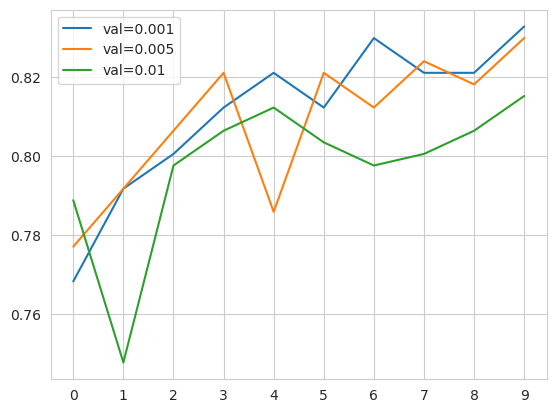

In [31]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [32]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [33]:
model.save_weights('model_v1.weights.h5')

In [34]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [35]:
learning_rate = 0.00111

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=16,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/16
94/96 ━━━━━━━━━━━━━━━━━━━━ 6:27 194s/step - accuracy: 0.5253 - loss: 1.4476    

96/96 ━━━━━━━━━━━━━━━━━━━━ 18014s 190s/step - accuracy: 0.6356 - loss: 1.0802 - val_accuracy: 0.7654 - val_loss: 0.6857
Epoch 2/16
63/96 ━━━━━━━━━━━━━━━━━━━━ 2:39:40 290s/step - accuracy: 0.7785 - loss: 0.6499

96/96 ━━━━━━━━━━━━━━━━━━━━ -17985s 94ms/step - accuracy: 0.7891 - loss: 0.6137 - val_accuracy: 0.7801 - val_loss: 0.6293
Epoch 3/16
79/96 ━━━━━━━━━━━━━━━━━━━━ 1:05:23 231s/step - accuracy: 0.8323 - loss: 0.5048

96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.8364 - loss: 0.4955 - val_accuracy: 0.8035 - val_loss: 0.5639
Epoch 4/16
82/96 ━━━━━━━━━━━━━━━━━━━━ 51:51 222s/step - accuracy: 0.8691 - loss: 0.4062   

96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.8673 - loss: 0.4147 - val_accuracy: 0.8182 - val_loss: 0.5364
Epoch 5/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8937 - loss: 0.3548 - val_accuracy: 0.7977 - val_loss: 0.6126
Epoch 6/16
44/96 ━━━━━━━━━━━━━━━━━━━━ 6:02:44 419s/step - accuracy: 0.9215 - loss: 0.3101

96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.9104 - loss: 0.3122 - val_accuracy: 0.8416 - val_loss: 0.5172
Epoch 7/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.9296 - loss: 0.2700 - val_accuracy: 0.8270 - val_loss: 0.5189
Epoch 8/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9368 - loss: 0.2458 - val_accuracy: 0.8328 - val_loss: 0.5200
Epoch 9/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.9498 - loss: 0.2166 - val_accuracy: 0.8211 - val_loss: 0.5243
Epoch 10/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9570 - loss: 0.1967 - val_accuracy: 0.8240 - val_loss: 0.5284
Epoch 11/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.9632 - loss: 0.1785 - val_accuracy: 0.8182 - val_loss: 0.5351
Epoch 12/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.9736 - loss: 0.1591 - val_accuracy: 0.8270 - val_loss: 0.5222
Epoch 13/16
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9739 - loss: 0.1465 - val_accuracy: 0.8065 - val_lo

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [36]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
    outputs = keras.layers.Dense(10)(inner)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [37]:
learning_rate = 0.00111

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - accuracy: 0.4941 - loss: 1.5279 - val_accuracy: 0.6950 - val_loss: 1.0479
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.7164 - loss: 0.8683 - val_accuracy: 0.7507 - val_loss: 0.7772
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.7911 - loss: 0.6470 - val_accuracy: 0.8035 - val_loss: 0.6544
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.8344 - loss: 0.5094 - val_accuracy: 0.8065 - val_loss: 0.6199
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.8673 - loss: 0.4251 - val_accuracy: 0.8094 - val_loss: 0.6052
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.8902 - loss: 0.3614 - val_accuracy: 0.8035 - val_loss: 0.5937
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18005s 190s/step - accuracy: 0.9153 - loss: 0.3081 - val_accuracy: 0.8094 - val_loss: 0.5719
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ -17984s -189312101us/step - accuracy: 0.9283 - loss: 0.268

2025-12-02 06:35:51.683210: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-02 06:35:52.273233: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4237', 68 bytes spill stores, 68 bytes spill loads



91/96 ━━━━━━━━━━━━━━━━━━━━ 16:40 200s/step - accuracy: 0.5558 - loss: 1.2925  

2025-12-02 11:36:02.432859: E external/local_xla/xla/service/slow_operation_alarm.cc:73] 
********************************
[Compiling module a_inference_one_step_on_data_134153__.1258] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2025-12-02 06:36:08.520478: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 604.503581ms

********************************
[Compiling module a_inference_one_step_on_data_134153__.1258] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - accuracy: 0.6728 - loss: 0.9697 - val_accuracy: 0.8152 - val_loss: 0.6220
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.8266 - loss: 0.5135 - val_accuracy: 0.8065 - val_loss: 0.6126
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.8801 - loss: 0.3545 - val_accuracy: 0.8123 - val_loss: 0.5497
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9254 - loss: 0.2445 - val_accuracy: 0.8299 - val_loss: 0.5649
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.9505 - loss: 0.1701 - val_accuracy: 0.8211 - val_loss: 0.6010
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9700 - loss: 0.1247 - val_accuracy: 0.8328 - val_loss: 0.5922
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9840 - loss: 0.0845 - val_accuracy: 0.8299 - val_loss: 0.6090
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9935 - loss: 0.0583 - val_accuracy: 0.8358 - val_loss

2025-12-02 06:37:35.980045: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-02 06:37:36.444530: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3793', 24 bytes spill stores, 24 bytes spill loads

2025-12-02 06:37:36.617232: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4237', 68 bytes spill stores, 68 bytes spill loads

2025-12-02 11:37:31.288659: E external/local_xla/xla/service/slow_operation_alarm.cc:73] 
********************************
[Compiling module a_inference_one_step_on_data_146407__.6174] Very slow compi

13/96 ━━━━━━━━━━━━━━━━━━━━ 34:34:25 1500s/step - accuracy: 0.3464 - loss: 2.2151

2025-12-02 06:37:41.303643: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3800', 4 bytes spill stores, 4 bytes spill loads

2025-12-02 06:37:41.390334: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3793', 56 bytes spill stores, 56 bytes spill loads

2025-12-02 06:37:41.476236: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3800', 32 bytes spill stores, 32 bytes spill loads

2025-12-02 06:37:41.484384: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3800', 32 bytes spill stores, 32 bytes spill loads



78/96 ━━━━━━━━━━━━━━━━━━━━ 1:10:08 234s/step - accuracy: 0.5611 - loss: 1.3976

2025-12-02 11:37:48.196789: E external/local_xla/xla/service/slow_operation_alarm.cc:73] 
********************************
[Compiling module gemm_fusion_dot.1086] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2025-12-02 11:37:48.196812: E external/local_xla/xla/service/slow_operation_alarm.cc:73] 
********************************
[Compiling module gemm_fusion_dot.1086] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2025-12-02 11:37:48.196814: E external/local_xla/xla/service/slow_operation_alarm.cc:73] 
********************************
[Compiling module gemm_fusion_dot.1093] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2025-12-02 11:37:48.196817: E external/local_xla/xla/se

96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 185ms/step - accuracy: 0.6855 - loss: 0.9617 - val_accuracy: 0.7742 - val_loss: 0.6551
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.8331 - loss: 0.4568 - val_accuracy: 0.7859 - val_loss: 0.6053
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.9035 - loss: 0.2754 - val_accuracy: 0.8094 - val_loss: 0.5986
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9488 - loss: 0.1601 - val_accuracy: 0.7947 - val_loss: 0.6566
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9804 - loss: 0.0792 - val_accuracy: 0.8240 - val_loss: 0.5900
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9919 - loss: 0.0450 - val_accuracy: 0.8065 - val_loss: 0.6636
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.9958 - loss: 0.0266 - val_accuracy: 0.8006 - val_loss: 0.6817
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9912 - loss: 0.0437 - val_accuracy: 0.8211 - val_loss

In [39]:
scores

{10: {'accuracy': [0.49413299560546875,
   0.7164276242256165,
   0.7910690903663635,
   0.834419846534729,
   0.8673402667045593,
   0.8901564478874207,
   0.9152542352676392,
   0.9282920360565186,
   0.9410039186477661,
   0.944915235042572],
  'loss': [1.527877688407898,
   0.8682711124420166,
   0.6469672322273254,
   0.5093518495559692,
   0.42512354254722595,
   0.36138737201690674,
   0.3081347346305847,
   0.26894715428352356,
   0.23148587346076965,
   0.2039509266614914],
  'val_accuracy': [0.6950146555900574,
   0.7507331371307373,
   0.803519070148468,
   0.8064516186714172,
   0.8093841671943665,
   0.803519070148468,
   0.8093841671943665,
   0.8152492642402649,
   0.8211143612861633,
   0.8093841671943665],
  'val_loss': [1.047928810119629,
   0.7771554589271545,
   0.6544170379638672,
   0.6199448108673096,
   0.6052334308624268,
   0.5937062501907349,
   0.5719281435012817,
   0.5906237959861755,
   0.580488383769989,
   0.5928100347518921]},
 100: {'accuracy': [0.672

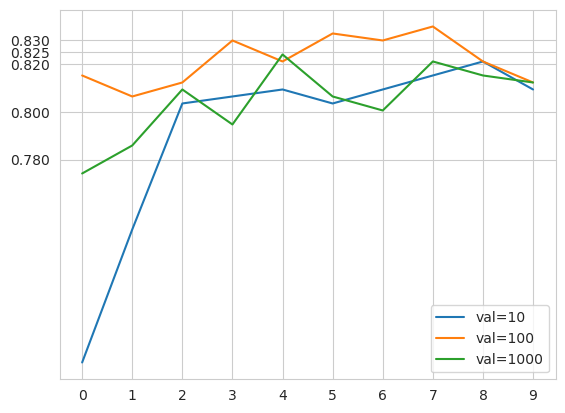

In [38]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [40]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [41]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30


2025-12-02 11:56:15.063234: E external/local_xla/xla/service/slow_operation_alarm.cc:73] 
********************************
[Compiling module a_inference_one_step_on_data_160715__.6174] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2025-12-02 06:56:21.091375: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 897.292605ms

********************************
[Compiling module a_inference_one_step_on_data_160715__.6174] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 198ms/step - accuracy: 0.6809 - loss: 0.9362 - val_accuracy: 0.7566 - val_loss: 0.6633
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.8292 - loss: 0.4981 - val_accuracy: 0.7977 - val_loss: 0.5917
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.8846 - loss: 0.3380 - val_accuracy: 0.7947 - val_loss: 0.6168
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9276 - loss: 0.2428 - val_accuracy: 0.8211 - val_loss: 0.5963
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.9566 - loss: 0.1693 - val_accuracy: 0.8152 - val_loss: 0.5822
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9788 - loss: 0.1077 - val_accuracy: 0.8240 - val_loss: 0.5723
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9876 - loss: 0.0779 - val_accuracy: 0.8152 - val_loss: 0.6465
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - accuracy: 0.9935 - loss: 0.0558 - val_accuracy: 0.8065 - val_lo

2025-12-02 12:01:12.691769: E external/local_xla/xla/service/slow_operation_alarm.cc:73] 
********************************
[Compiling module a_inference_one_step_on_data_184149__.6550] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2025-12-02 07:01:19.042599: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 981.978902ms

********************************
[Compiling module a_inference_one_step_on_data_184149__.6550] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - accuracy: 0.6411 - loss: 1.0540 - val_accuracy: 0.7595 - val_loss: 0.7056
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.7846 - loss: 0.6286 - val_accuracy: 0.8152 - val_loss: 0.6079
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8305 - loss: 0.4912 - val_accuracy: 0.8065 - val_loss: 0.5660
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.8752 - loss: 0.3691 - val_accuracy: 0.8211 - val_loss: 0.5555
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.9038 - loss: 0.2851 - val_accuracy: 0.8182 - val_loss: 0.5628
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9172 - loss: 0.2464 - val_accuracy: 0.8211 - val_loss: 0.5410
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.9469 - loss: 0.1829 - val_accuracy: 0.8123 - val_loss: 0.5592
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9599 - loss: 0.1448 - val_accuracy: 0.8328 - val_loss

2025-12-02 12:10:58.789333: E external/local_xla/xla/service/slow_operation_alarm.cc:73] 
********************************
[Compiling module a_inference_one_step_on_data_231021__.6550] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************
2025-12-02 12:10:58.794372: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 4h59m54.98238599s

********************************
[Compiling module a_inference_one_step_on_data_231021__.6550] Very slow compile? If you want to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
********************************


96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 153ms/step - accuracy: 0.3898 - loss: 1.8188 - val_accuracy: 0.6158 - val_loss: 1.1596
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.5091 - loss: 1.4369 - val_accuracy: 0.6657 - val_loss: 0.9872
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.5443 - loss: 1.2878 - val_accuracy: 0.7214 - val_loss: 0.8457
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.5802 - loss: 1.1878 - val_accuracy: 0.7566 - val_loss: 0.7982
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.5746 - loss: 1.1671 - val_accuracy: 0.7361 - val_loss: 0.7927
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.5971 - loss: 1.1069 - val_accuracy: 0.7390 - val_loss: 0.7745
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.6098 - loss: 1.0641 - val_accuracy: 0.7713 - val_loss: 0.7238
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.6255 - loss: 1.0140 - val_accuracy: 0.7801 - val_loss

IOStream.flush timed out


96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.7047 - loss: 0.7741 - val_accuracy: 0.8123 - val_loss: 0.5714
Epoch 23/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.7021 - loss: 0.7575 - val_accuracy: 0.8182 - val_loss: 0.5872
Epoch 24/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.7115 - loss: 0.7443 - val_accuracy: 0.8182 - val_loss: 0.5675
Epoch 25/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.7125 - loss: 0.7474 - val_accuracy: 0.8065 - val_loss: 0.5976
Epoch 26/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.7014 - loss: 0.7356 - val_accuracy: 0.8270 - val_loss: 0.5875
Epoch 27/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.7177 - loss: 0.7259 - val_accuracy: 0.8240 - val_loss: 0.5539
Epoch 28/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.7256 - loss: 0.7159 - val_accuracy: 0.8299 - val_loss: 0.5641
Epoch 29/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.7233 - loss: 0.6957 - val_accuracy: 0.806

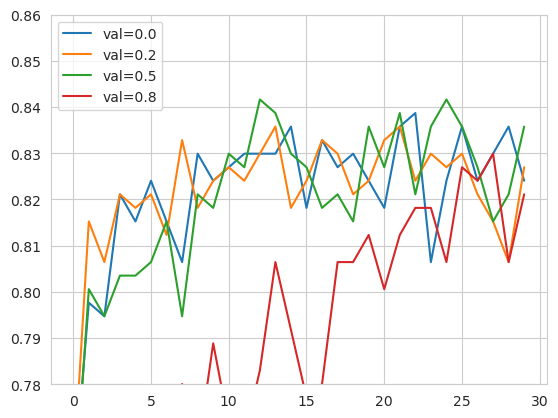

In [42]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

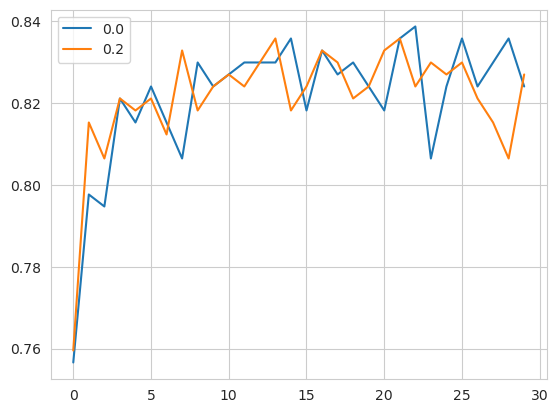

In [44]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [46]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    vertical_flip=True,
    rotation_range=30,
    width_shift_range=10.,
    height_shift_range=10.,
    shear_range=10.,
    zoom_range=.1,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [47]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 283ms/step - accuracy: 0.5150 - loss: 1.4426 - val_accuracy: 0.7361 - val_loss: 0.8364
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - accuracy: 0.6405 - loss: 1.0571 - val_accuracy: 0.7595 - val_loss: 0.7262
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.6864 - loss: 0.9286 - val_accuracy: 0.7302 - val_loss: 0.7827
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - accuracy: 0.6894 - loss: 0.8793 - val_accuracy: 0.7390 - val_loss: 0.7181
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.7106 - loss: 0.8215 - val_accuracy: 0.7537 - val_loss: 0.6637
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.7301 - loss: 0.7858 - val_accuracy: 0.7771 - val_loss: 0.6564
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 216ms/step - accuracy: 0.7428 - loss: 0.7466 - val_accuracy: 0.7889 - val_loss: 0.6155
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - accuracy: 0.7415 - loss: 0.7345 - val_accu

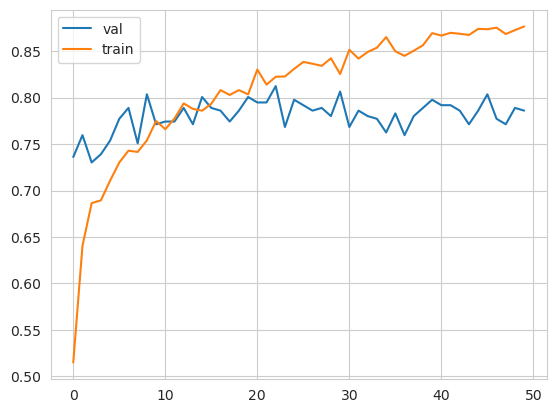

In [48]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [49]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)
    
    outputs = keras.layers.Dense(10)(drop)
    
    model = keras.Model(inputs, outputs)
    
    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [50]:
input_size = 299

In [51]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [52]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [53]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

Epoch 1/50


2025-12-02 07:44:02.144144: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv (f32[32,128,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,147,147]{3,2,1,0}, f32[128,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]} is taking a while...
2025-12-02 07:44:02.648109: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.504110329s
Trying algorithm eng3{k11=2} for conv (f32[32,128,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,128,147,147]{3,2,1,0}, f32[128,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target=

76/96 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.5314 - loss: 1.4519

2025-12-02 07:44:42.413124: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv (f32[28,128,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,128,147,147]{3,2,1,0}, f32[128,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]} is taking a while...
2025-12-02 07:44:42.724567: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.311562944s
Trying algorithm eng3{k11=2} for conv (f32[28,128,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,128,147,147]{3,2,1,0}, f32[128,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=128, custom_call_target=

93/96 ━━━━━━━━━━━━━━━━━━━━ 9:48 196s/step - accuracy: 0.5589 - loss: 1.3719

2025-12-02 12:45:02.080875: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv (f32[21,64,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[21,64,147,147]{3,2,1,0}, f32[64,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=64, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]} is taking a while...
2025-12-02 07:45:08.288797: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 496.922154ms
Trying algorithm eng3{k11=2} for conv (f32[21,64,147,147]{3,2,1,0}, u8[0]{0}) custom-call(f32[21,64,147,147]{3,2,1,0}, f32[64,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=64, custom_call_target="__cudnn

96/96 ━━━━━━━━━━━━━━━━━━━━ 88s 720ms/step - accuracy: 0.6965 - loss: 0.9692 - val_accuracy: 0.8358 - val_loss: 0.5468
Epoch 2/50
69/96 ━━━━━━━━━━━━━━━━━━━━ 1:59:12 265s/step - accuracy: 0.8266 - loss: 0.5549  

96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 333ms/step - accuracy: 0.8272 - loss: 0.5240 - val_accuracy: 0.8504 - val_loss: 0.4431
Epoch 3/50
28/96 ━━━━━━━━━━━━━━━━━━━━ 12:35:38 667s/step - accuracy: 0.8500 - loss: 0.4422 

96/96 ━━━━━━━━━━━━━━━━━━━━ 18027s 190s/step - accuracy: 0.8540 - loss: 0.4297 - val_accuracy: 0.8710 - val_loss: 0.3921
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ -17962s 329ms/step - accuracy: 0.8628 - loss: 0.3865 - val_accuracy: 0.8680 - val_loss: 0.3778
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 39s 408ms/step - accuracy: 0.8895 - loss: 0.3356 - val_accuracy: 0.8651 - val_loss: 0.4039
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 60s 622ms/step - accuracy: 0.8941 - loss: 0.3172 - val_accuracy: 0.8710 - val_loss: 0.3684
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 0.9025 - loss: 0.2998

96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 340ms/step - accuracy: 0.9019 - loss: 0.2965 - val_accuracy: 0.8768 - val_loss: 0.3631
Epoch 8/50
87/96 ━━━━━━━━━━━━━━━━━━━━ 31:25 210s/step - accuracy: 0.9027 - loss: 0.2744      

96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 349ms/step - accuracy: 0.9022 - loss: 0.2775 - val_accuracy: 0.8856 - val_loss: 0.3550
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 330ms/step - accuracy: 0.9143 - loss: 0.2594 - val_accuracy: 0.8680 - val_loss: 0.3732
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 345ms/step - accuracy: 0.9166 - loss: 0.2350 - val_accuracy: 0.8651 - val_loss: 0.3627
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.9340 - loss: 0.2130

96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 333ms/step - accuracy: 0.9250 - loss: 0.2244 - val_accuracy: 0.8886 - val_loss: 0.3326
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 342ms/step - accuracy: 0.9342 - loss: 0.2034 - val_accuracy: 0.8710 - val_loss: 0.3689
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 329ms/step - accuracy: 0.9270 - loss: 0.2092 - val_accuracy: 0.8534 - val_loss: 0.3899
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18027s 190s/step - accuracy: 0.9377 - loss: 0.1947 - val_accuracy: 0.8798 - val_loss: 0.3940
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ -17963s 327ms/step - accuracy: 0.9417 - loss: 0.1778 - val_accuracy: 0.8768 - val_loss: 0.3652
Epoch 16/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 337ms/step - accuracy: 0.9465 - loss: 0.1641 - val_accuracy: 0.8827 - val_loss: 0.3694
Epoch 17/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 31s 327ms/step - accuracy: 0.9462 - loss: 0.1595 - val_accuracy: 0.8827 - val_loss: 0.3648
Epoch 18/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 345ms/step - accuracy: 0.9498 - loss: 0.1488 - val_ac

96/96 ━━━━━━━━━━━━━━━━━━━━ -17964s -189094765us/step - accuracy: 0.9694 - loss: 0.0953 - val_accuracy: 0.8944 - val_loss: 0.3793
Epoch 32/50
37/96 ━━━━━━━━━━━━━━━━━━━━ 8:11:49 500s/step - accuracy: 0.9655 - loss: 0.1078  

KeyboardInterrupt: 

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [1]:
import tensorflow as tf
from tensorflow import keras

2025-12-02 08:10:01.031169: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-02 08:10:01.089973: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-02 08:10:02.483217: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [3]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [4]:
model = keras.models.load_model('xception_v4_1_31_0.894.h5')

I0000 00:00:1764663013.571537   82078 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21768 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


In [6]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.9005 - loss: 0.2756


[0.2755974531173706, 0.9005376100540161]

In [7]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [8]:
path = load_img(path, target_size=(299, 299))

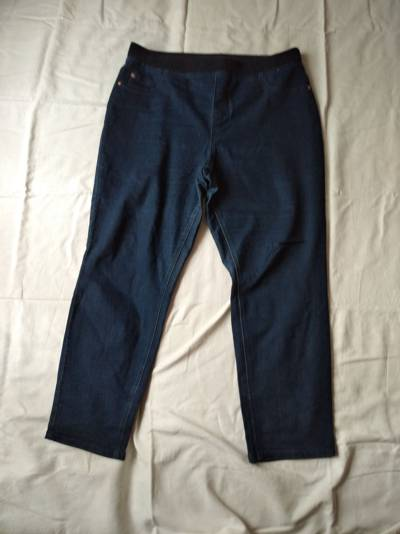

In [17]:
load_img(path)

In [9]:
import numpy as np

In [10]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [11]:
X = preprocess_input(X)

In [12]:
pred = model.predict(X)

2025-12-02 08:11:20.731315: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-02 13:11:14.799453: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng3{k11=2} for conv (f32[1,728,37,37]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,728,37,37]{3,2,1,0}, f32[728,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=728, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]} is taking a while...
2025-12-02 08:11:20.907580: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optim

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


In [13]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [14]:
dict(zip(classes, pred[0]))

{'dress': np.float32(-2.7799876),
 'hat': np.float32(-4.9293566),
 'longsleeve': np.float32(-2.2177107),
 'outwear': np.float32(-3.0062315),
 'pants': np.float32(12.80514),
 'shirt': np.float32(-2.8381987),
 'shoes': np.float32(-4.2859097),
 'shorts': np.float32(4.347278),
 'skirt': np.float32(-4.9690523),
 't-shirt': np.float32(-3.9352183)}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them 

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

